# 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# For Korean Fonts
from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"] = False
path = "C:\Windows\Fonts\H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font_name)

# 1. Data Read In and Further Preprocessing

In [3]:
df = pd.read_csv("../data/interim/labeled_data_preprocessed.csv")

In [4]:
df.head()

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 00:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.59,...,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,24.799999,27.5
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 00:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.60,...,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 00:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,9.60,...,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 00:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,9.59,...,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,25.000000,27.6
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 00:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.59,...,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,25.000000,27.6


In [5]:
# "TimeStamp", "PART_FACT_PLAN_DATE" column을 datetime으로 변환

df["TimeStamp"] = pd.to_datetime(df["TimeStamp"])
df["PART_FACT_PLAN_DATE"] = pd.to_datetime(df["PART_FACT_PLAN_DATE"])

In [6]:
df.set_index("TimeStamp", inplace=True)

In [7]:
df.head()

,_id,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,...,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-16 04:57:47,5f8928bb9c0189cc666ef19b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.59,4.47,...,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,24.799999,27.5
2020-10-16 04:58:48,5f8928de9c0189cc666ef20b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.60,4.48,...,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6
2020-10-16 04:58:48,5f8928df9c0189cc666ef213,2020-10-16,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,9.60,4.48,...,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6
2020-10-16 04:59:48,5f8928f39c0189cc666ef25e,2020-10-16,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,9.59,4.48,...,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,25.000000,27.6
2020-10-16 04:59:48,5f8928f59c0189cc666ef265,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.59,4.48,...,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,25.000000,27.6


# 2. EDA #1

## 2.1. Classification of Numerical and Categorical Columns

In [8]:
df.columns

Index(['_id', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME',
       'EQUIP_CD', 'EQUIP_NAME', 'PassOrFail', 'Reason', 'Injection_Time',
       'Filling_Time', 'Plasticizing_Time', 'Cycle_Time', 'Clamp_Close_Time',
       'Cushion_Position', 'Switch_Over_Position', 'Plasticizing_Position',
       'Clamp_Open_Position', 'Max_Injection_Speed', 'Max_Screw_RPM',
       'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Barrel_Temperature_7', 'Hopper_Temperature',
       'Mold_Temperature_3', 'Mold_Temperature_4'],
      dtype='object')

In [9]:
numeric_columns = [
    'PassOrFail', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 
    'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position', 
    'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed', 
    'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
    'Max_Switch_Over_Pressure', 'Max_Back_Pressure', 'Average_Back_Pressure', 
    'Barrel_Temperature_1', 'Barrel_Temperature_2', 'Barrel_Temperature_3', 
    'Barrel_Temperature_4', 'Barrel_Temperature_5', 'Barrel_Temperature_6', 
    'Barrel_Temperature_7', 'Hopper_Temperature', 'Mold_Temperature_3', 
    'Mold_Temperature_4'
]

categorical_columns = [
    'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 
    'EQUIP_NAME', 'Reason', 
]

In [10]:
df[categorical_columns] = df[categorical_columns].astype("category")

## 2.2. Plots for Numerical Features

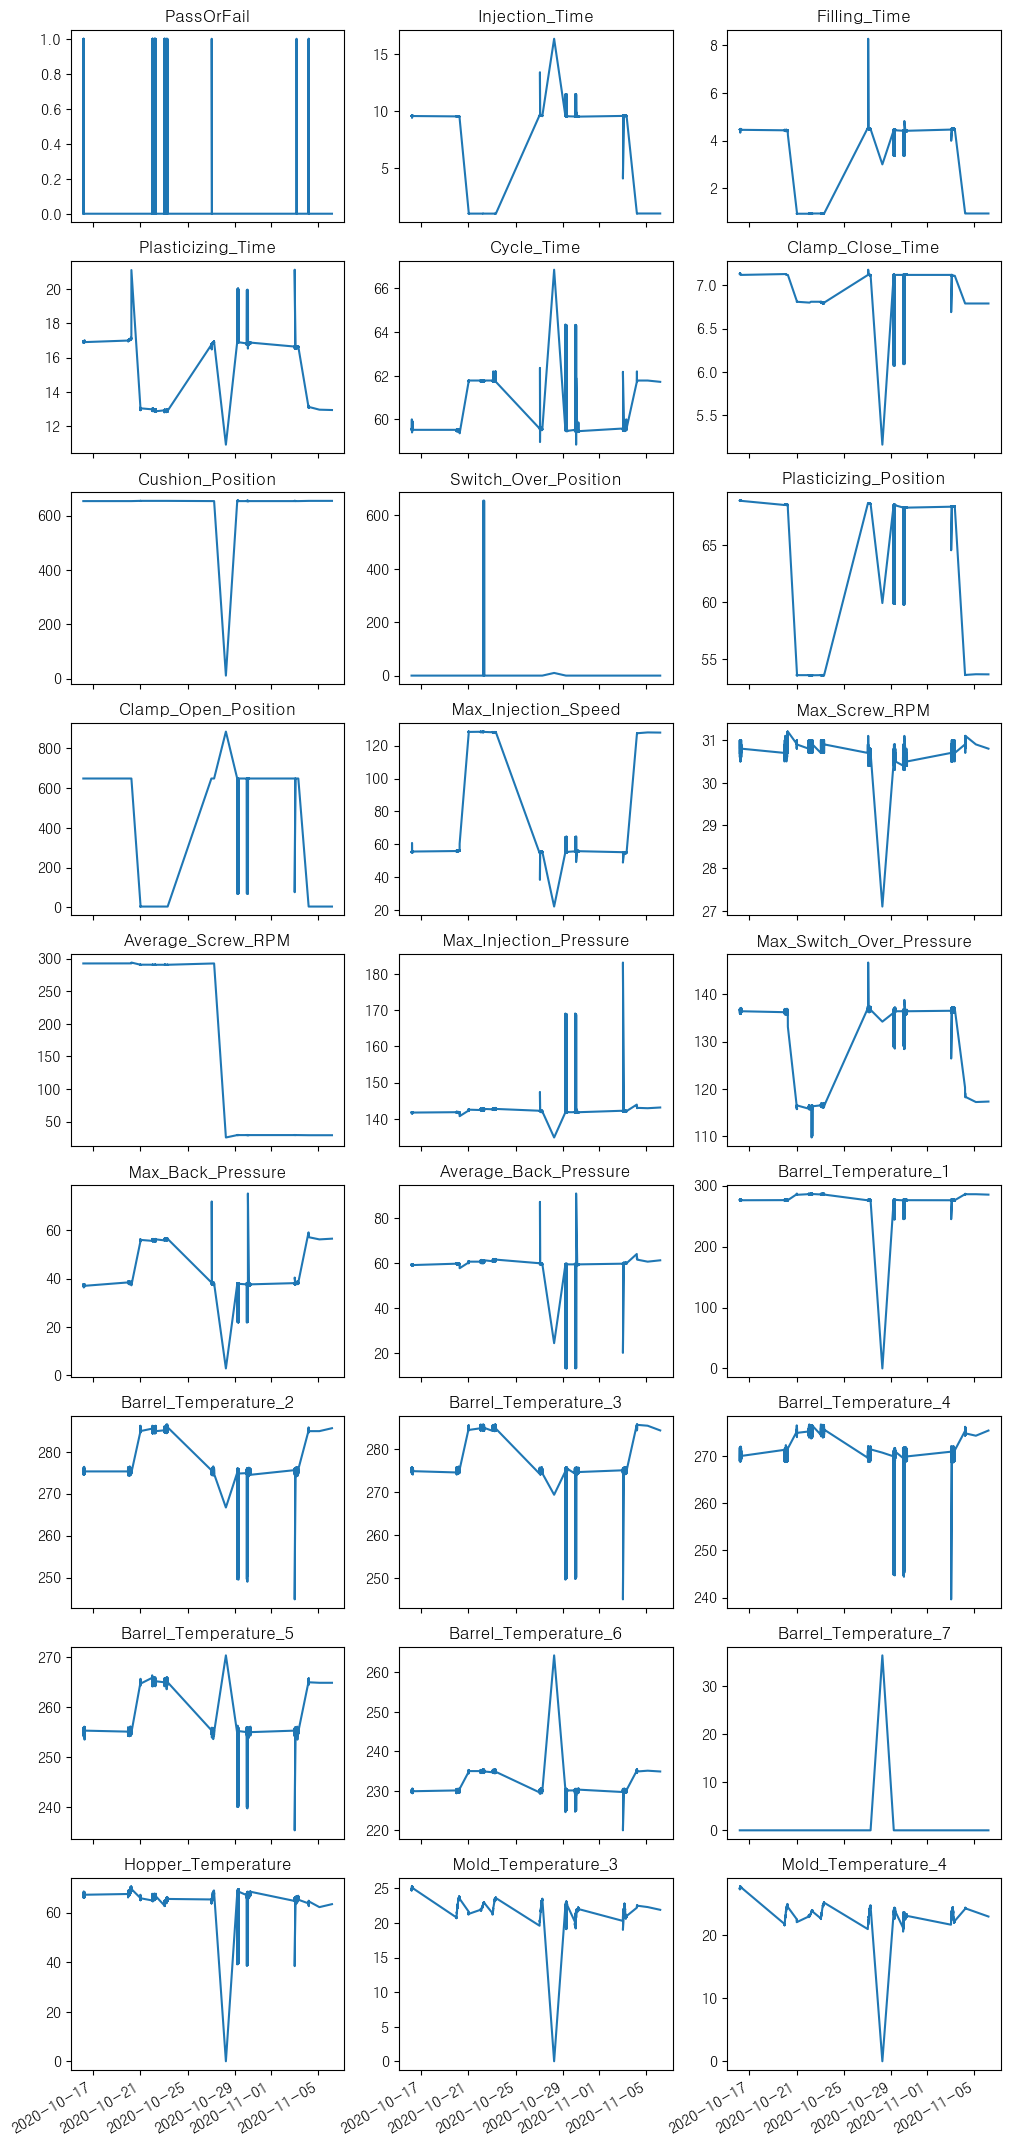

In [11]:
fig, axs = plt.subplots(
    figsize=(12, 30),
    nrows=9, ncols=3,
    sharex=True
)
r = 0
c = 0
for col in numeric_columns:
    axs[r, c].plot(df[f"{col}"])
    axs[r, c].set_title(f"{col}")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
fig.autofmt_xdate()
plt.show();

## 2.3. Plots for Categorical Features

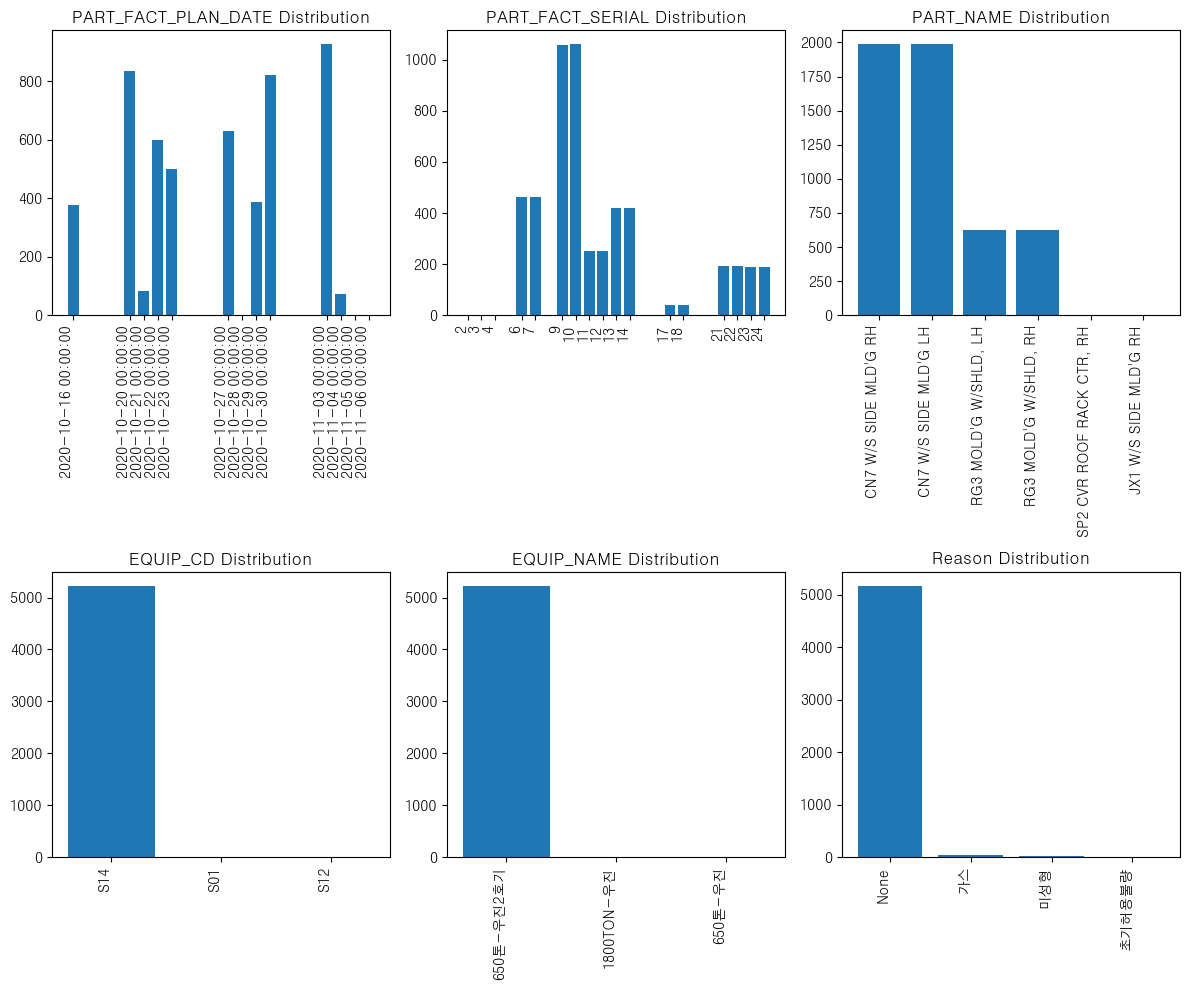

In [12]:
fig, axs = plt.subplots(
    figsize=(12, 10),
    nrows=2, ncols=3,
)
r = 0
c = 0
for col in categorical_columns:
    temp = df.groupby(f"{col}", observed=True).size()
    axs[r, c].bar(temp.index, temp.values)
    axs[r, c].set_title(f"{col} Distribution")
    axs[r, c].set_xticks(temp.index)
    axs[r, c].set_xticklabels(temp.index, rotation=90, ha="right")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0

plt.tight_layout()
plt.show();

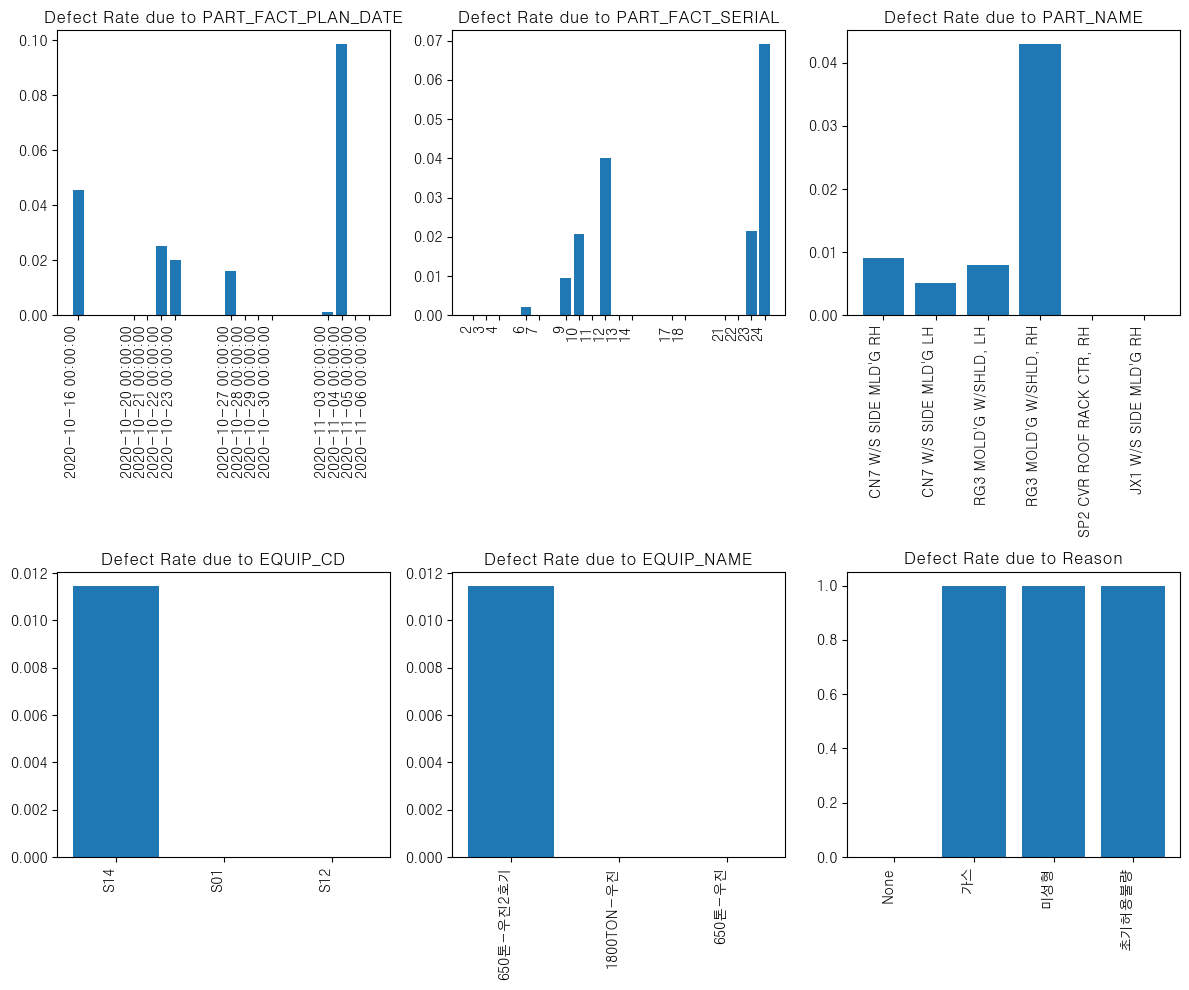

In [13]:
fig, axs = plt.subplots(
    figsize=(12, 10),
    nrows=2, ncols=3,
)
r = 0
c = 0
for col in categorical_columns:
    temp_df = df.groupby(f"{col}", observed=True)[["PassOrFail"]].mean()
    axs[r, c].bar(temp_df.index, temp_df["PassOrFail"])
    axs[r, c].set_title(f"Defect Rate due to {col}")
    axs[r, c].set_xticks(temp_df.index)
    axs[r, c].set_xticklabels(temp_df.index, rotation=90, ha="right")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0

plt.tight_layout()
plt.show();

In [14]:
df["EQUIP_NAME"].value_counts()

650톤-우진2호기    5230
1800TON-우진       1
650톤-우진          1
Name: EQUIP_NAME, dtype: int64

In [15]:
df["EQUIP_CD"].value_counts()

S14    5230
S01       1
S12       1
Name: EQUIP_CD, dtype: int64

## 2.4. Conclusion from EDA #1

- Among 3 injection molding machine, only 1 machine has enough data for analysis. Other 2 machines will be omitted from the analysis. In addition, the columns, `EQUIP_NAME` and `EQUIP_CD` will be dropped from the data.

In [16]:
df = df.query("EQUIP_NAME == '650톤-우진2호기'")
df = df.drop(columns=["EQUIP_NAME", "EQUIP_CD"])

In [17]:
df.nunique()

_id                         5230
PART_FACT_PLAN_DATE           12
PART_FACT_SERIAL              16
PART_NAME                      4
PassOrFail                     2
Reason                         4
Injection_Time                34
Filling_Time                  33
Plasticizing_Time            119
Cycle_Time                    46
Clamp_Close_Time              11
Cushion_Position              20
Switch_Over_Position           2
Plasticizing_Position         47
Clamp_Open_Position            3
Max_Injection_Speed           53
Max_Screw_RPM                 10
Average_Screw_RPM             15
Max_Injection_Pressure        33
Max_Switch_Over_Pressure      67
Max_Back_Pressure             66
Average_Back_Pressure         51
Barrel_Temperature_1          66
Barrel_Temperature_2          58
Barrel_Temperature_3          43
Barrel_Temperature_4          78
Barrel_Temperature_5          54
Barrel_Temperature_6          35
Barrel_Temperature_7           1
Hopper_Temperature            92
Mold_Tempe

In [18]:
# Barrel_Temperature_7 will be droped, since it has only one unique value

df = df.drop(columns=["Barrel_Temperature_7"])

# 3. EDA #2

## 3.1. Classification of Numerical and Categorical Columns

In [19]:
df.columns

Index(['_id', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME',
       'PassOrFail', 'Reason', 'Injection_Time', 'Filling_Time',
       'Plasticizing_Time', 'Cycle_Time', 'Clamp_Close_Time',
       'Cushion_Position', 'Switch_Over_Position', 'Plasticizing_Position',
       'Clamp_Open_Position', 'Max_Injection_Speed', 'Max_Screw_RPM',
       'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Hopper_Temperature', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

In [20]:
numeric_columns = [
    'PassOrFail', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 
    'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position', 
    'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed', 
    'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
    'Max_Switch_Over_Pressure', 'Max_Back_Pressure', 'Average_Back_Pressure', 
    'Barrel_Temperature_1', 'Barrel_Temperature_2', 'Barrel_Temperature_3', 
    'Barrel_Temperature_4', 'Barrel_Temperature_5', 'Barrel_Temperature_6', 
    'Hopper_Temperature', 'Mold_Temperature_3', 'Mold_Temperature_4'
]

categorical_columns = [
    'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME', 'Reason',
]

In [21]:
df[categorical_columns] = df[categorical_columns].astype("str")    # To reset the categories
df[categorical_columns] = df[categorical_columns].astype("category")

## 3.2. Comparison of Processing Parameters Based on `Part_Name`

In [22]:
df.head()

,_id,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-16 04:57:47,5f8928bb9c0189cc666ef19b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.59,4.47,16.92,59.520000,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
2020-10-16 04:58:48,5f8928de9c0189cc666ef20b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.60,4.48,16.91,59.580002,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2020-10-16 04:58:48,5f8928df9c0189cc666ef213,2020-10-16,23,CN7 W/S SIDE MLD'G LH,0,None,9.60,4.48,16.91,59.580002,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2020-10-16 04:59:48,5f8928f39c0189cc666ef25e,2020-10-16,23,CN7 W/S SIDE MLD'G LH,0,None,9.59,4.48,16.91,59.560001,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
2020-10-16 04:59:48,5f8928f59c0189cc666ef265,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.59,4.48,16.91,59.560001,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6


In [23]:
numeric_features = [
    'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 
    'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position', 
    'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed', 
    'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
    'Max_Switch_Over_Pressure', 'Max_Back_Pressure', 'Average_Back_Pressure', 
    'Barrel_Temperature_1', 'Barrel_Temperature_2', 'Barrel_Temperature_3', 
    'Barrel_Temperature_4', 'Barrel_Temperature_5', 'Barrel_Temperature_6', 
    'Hopper_Temperature', 'Mold_Temperature_3', 'Mold_Temperature_4'
]

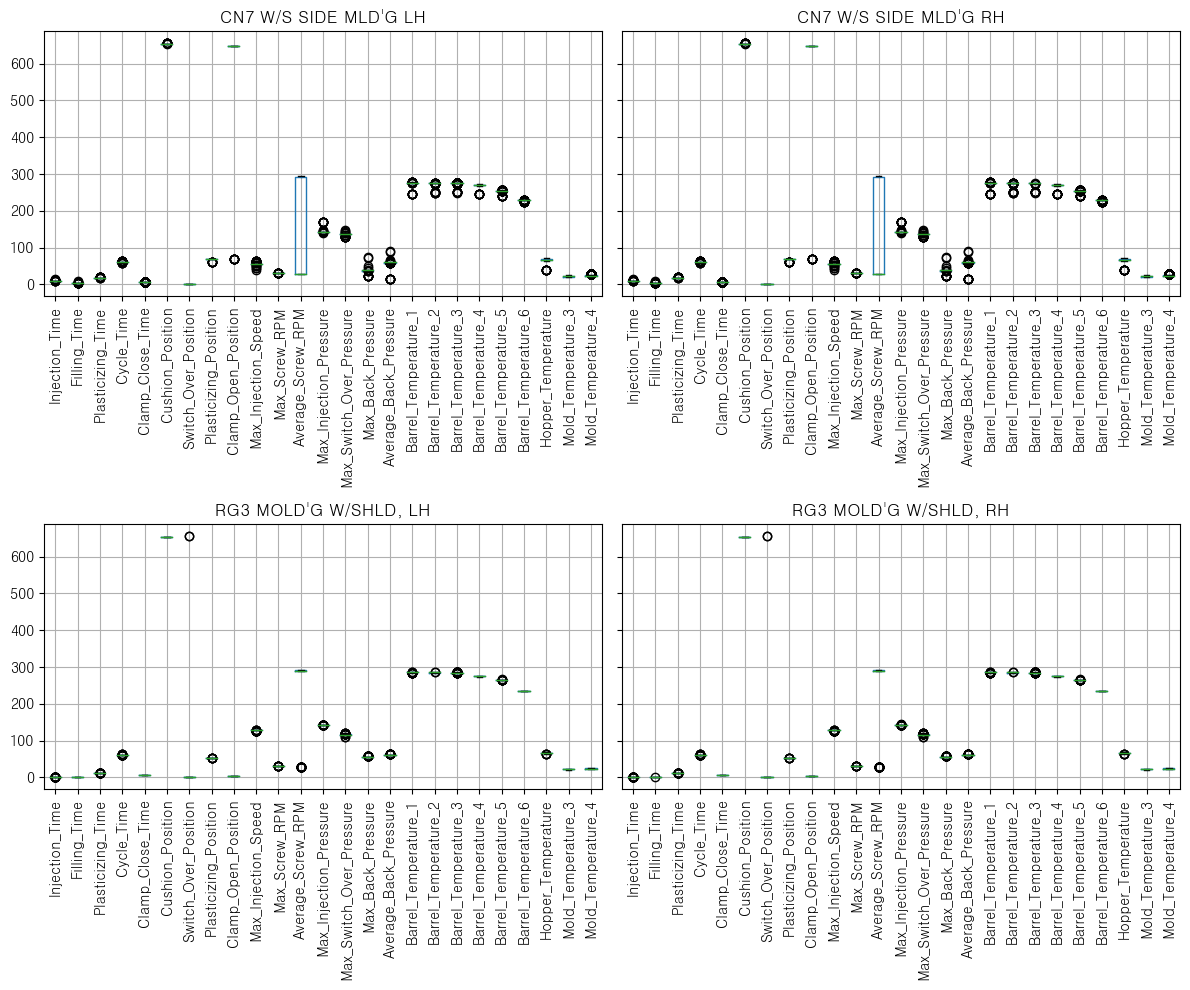

In [24]:
df.groupby("PART_NAME")[numeric_features].boxplot(
    figsize=(12, 10),
    rot=90
)
plt.tight_layout()
fig = plt.gcf()
plt.show();
fig.savefig("../img/process_parameter_distribution.png")

## 3.3. Conclusion from EDA #2

- `CN7` products and `RG3` products have different processing conditions --> It seems reasonable to have separate models for `CN7` and `RG3` products
- The difference in processing conditions for `LH` and `RH` is negligible --> Additional analysis is required to determine whether `LH` and `RH` need to be included as a feature.
- Categorical features don't seem to have significant effect on the `PassOrFail`

# 4. Preparation of individual CSV files for `CN7` and `RG3`

In [25]:
df_CN7 = df.loc[df["PART_NAME"].str.contains("CN7")]
df_RG3 = df.loc[df["PART_NAME"].str.contains("RG3")]

In [26]:
df_CN7.to_csv("../data/interim/labeled_data_CN7.csv", index=True)
df_RG3.to_csv("../data/interim/labeled_data_RG3.csv", index=True)